# Introduction to random distribution

> Correctly called random variable, these random variable are usefull in hyperparameter tuning.  

For each hyperparmeter, a range can be defined, that is, a statistical distribution, which makes the hyperparameter a random variable.
This random variable will defined what value the hyperparameter is likely to take. 

Let's explore the hyperparameter distributions, by plotting the following graph :
    - Probability distribution function (pdf) or probability mass function (pmf)
    - Cumulative distribution function (cdf)
    - Histogram of sampling. 

## Plotting Each Hyperparameter Distribution

Let's first define a few functions to then plot them each. 

In [1]:
# Note: some of the code in the present code block is derived from another project licensed under The MIT License (MIT), 
# Copyright (c) 2017 Vooban Inc. For the full information, see:
#     https://github.com/guillaume-chevalier/Hyperopt-Keras-CNN-CIFAR-100/blob/Vooban/LICENSE

from neuraxle.hyperparams.distributions import *
from neuraxle.hyperparams.space import HyperparameterSpace
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

DISCRETE_NUM_BINS = 40
CONTINUOUS_NUM_BINS = 1000
NUM_TRIALS = 100000
X_DOMAIN = np.array(range(-100, 600)) / 100


def plot_histogram(title: str, distribution: HyperparameterDistribution, num_bins=50):
    samples = np.array([
        distribution.rvs() for _ in range(NUM_TRIALS)
    ], dtype=np.float).flatten()

    pdf_values = []
    for value in X_DOMAIN:
        try:
            pdf_values.append(distribution.pdf(value))
        except ValueError:
            pdf_values.append(0.)
            
    pdf_values = np.array(pdf_values)
    
    plt.figure(figsize=(17,5))
    ax=plt.gca()
    hist = plt.hist(samples, bins=num_bins, label="hist")
    renormalization_const = hist[0].max() / pdf_values.max()
    renormalized_pdf_values = renormalization_const * pdf_values
    
    plt.plot(X_DOMAIN, renormalized_pdf_values, label="renorm pdf")
    plt.title("Histogram (pdf) for a {} distribution".format(title))
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels)
    plt.xlim([X_DOMAIN.min(), X_DOMAIN.max()])
    plt.show()
    
def plot_pdf_cdf(title: str, distribution: HyperparameterDistribution):
    pdf_values = []
    cdf_values = []
    for value in X_DOMAIN:
        try:
            pdf_values.append(distribution.pdf(value))
        except ValueError:
            pdf_values.append(0.)
            
        try:
            cdf_values.append(distribution.cdf(value))
        except ValueError:
            cdf_values.append(0.)
            
    pdf_values = np.array(pdf_values)
    cdf_values = np.array(cdf_values)
    plt.figure(figsize=(17,5))
    ax=plt.gca()
    plt.plot(X_DOMAIN, pdf_values, label="pdf")
    plt.plot(X_DOMAIN, cdf_values, label="cdf")
    plt.title("Pdf and cdf for a {} distribution".format(title))
    handles, labels = ax.get_legend_handles_labels()
    # sort both labels and handles by labels
    labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
    ax.legend(handles, labels)
    plt.xlim([X_DOMAIN.min(), X_DOMAIN.max()])
    plt.show()
    
def plot_distribution_space(hyperparameter_space: HyperparameterSpace, num_bins=50):
    for title, distribution in hyperparameter_space.items():
        print(title + ":")
        plot_histogram(title, distribution, num_bins=num_bins)
        plot_pdf_cdf(title, distribution)
        

In [2]:
### Discrete Distributions

# Here are now the discrete standard distributions, which sample discrete value or categories.
# For example, Boolean distribution gives either true or false.

randint:


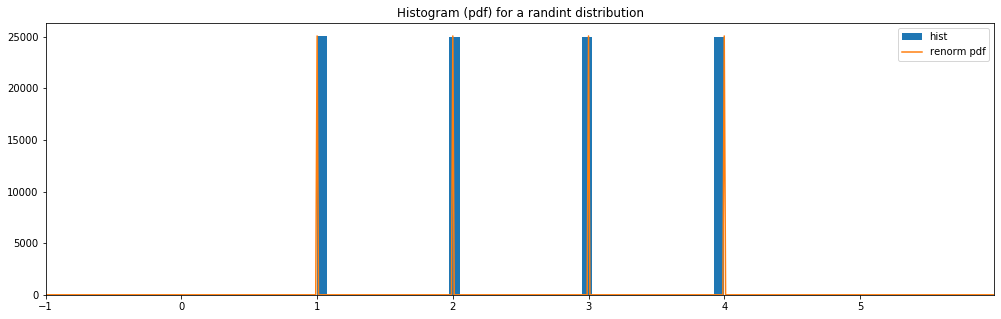

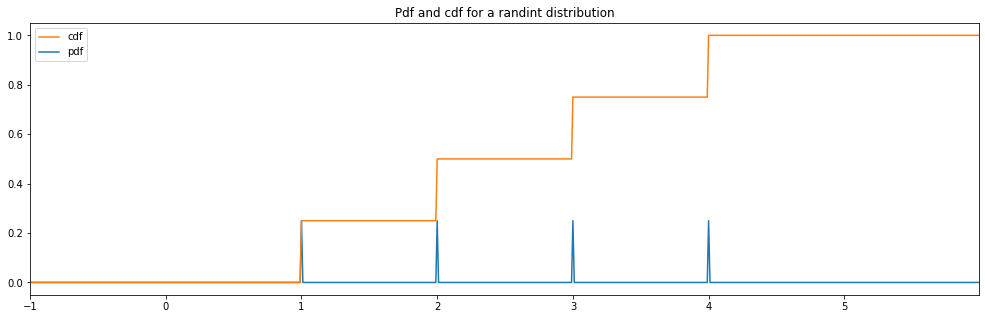

boolean:


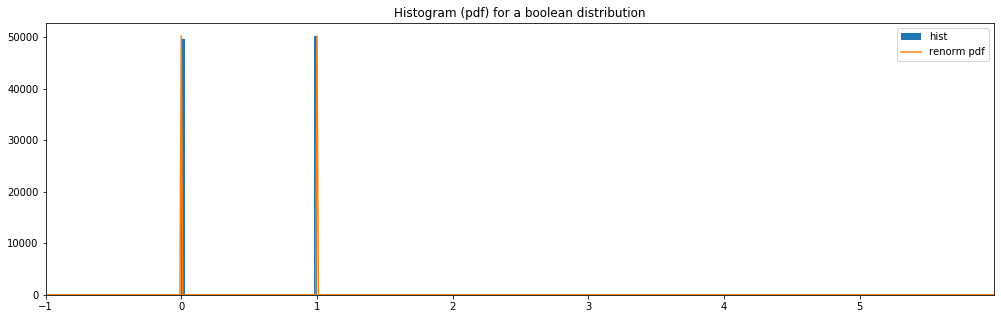

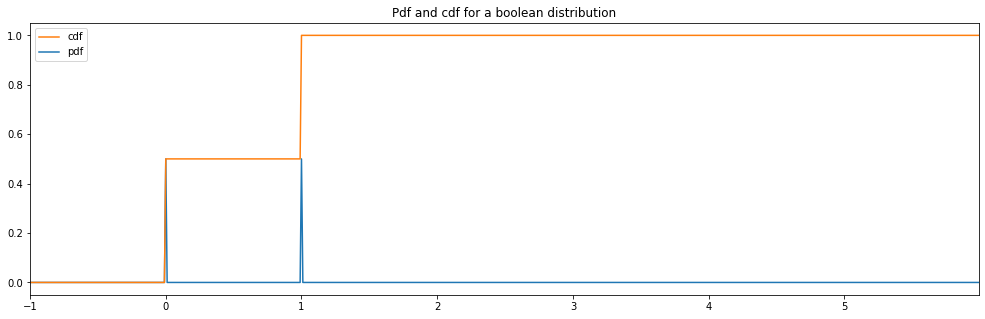

choice:


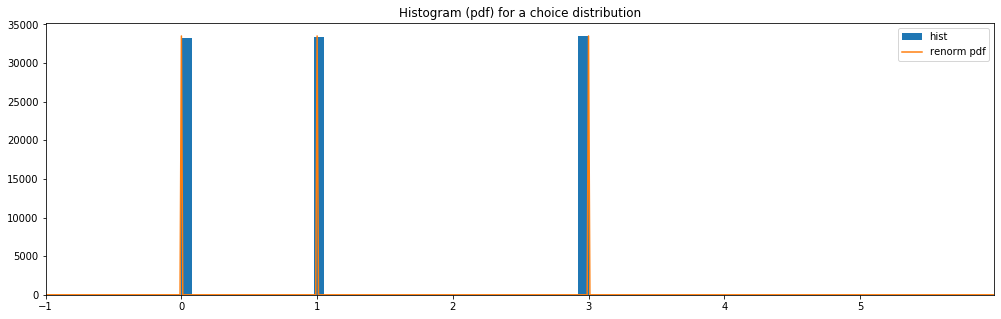

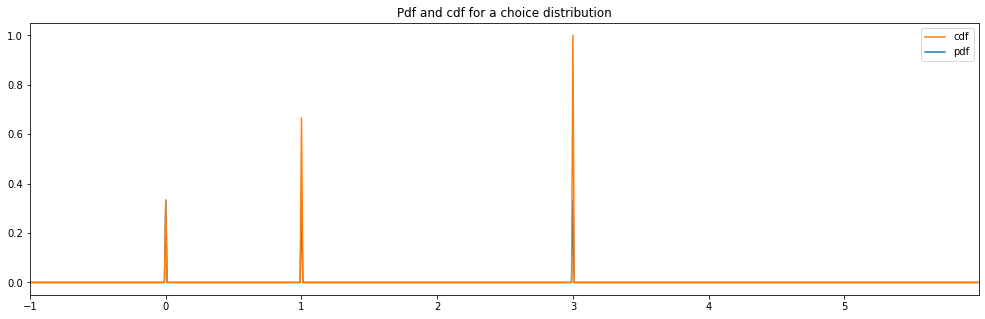

priority_choice:


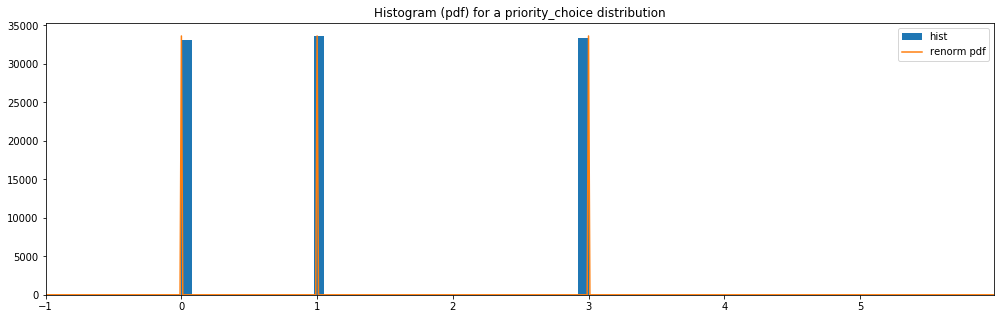

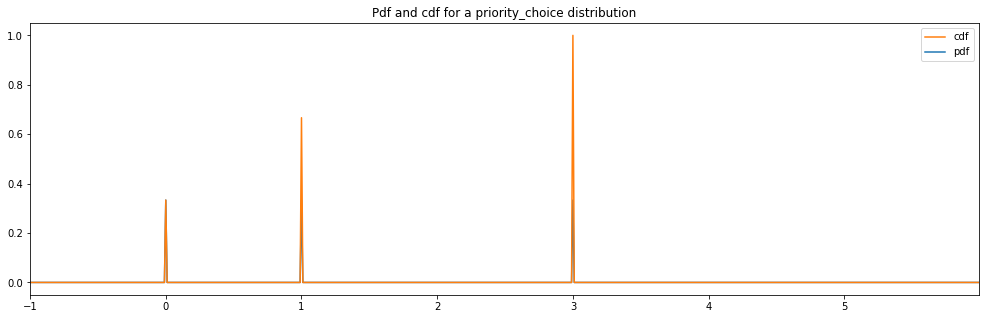

In [3]:
discrete_hyperparameter_space = HyperparameterSpace({
    "randint": RandInt(1, 4),
    "boolean": Boolean(),
    "choice": Choice([0, 1, 3]),
    "priority_choice": PriorityChoice([0, 1, 3])
})
plot_distribution_space(discrete_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)


In [4]:
### Continuous Distributions

# Here are now the continuous distributions, which sample a continuous range of values. Those are probably the ones you'll most use. 

uniform:


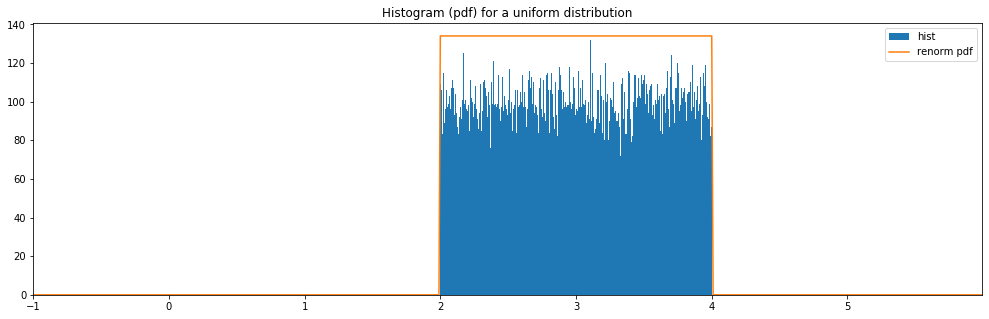

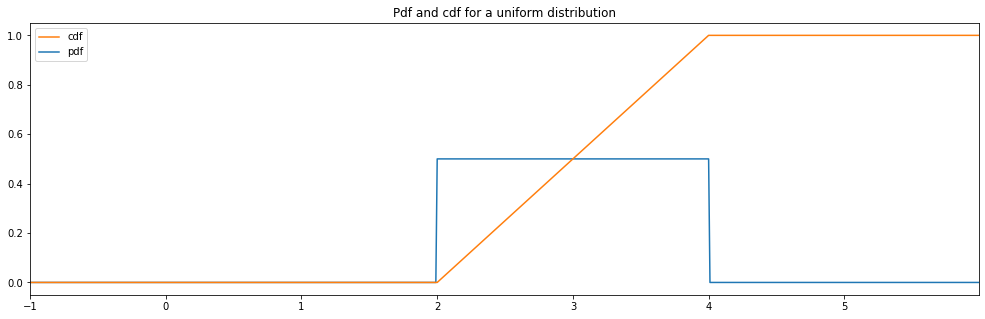

loguniform:


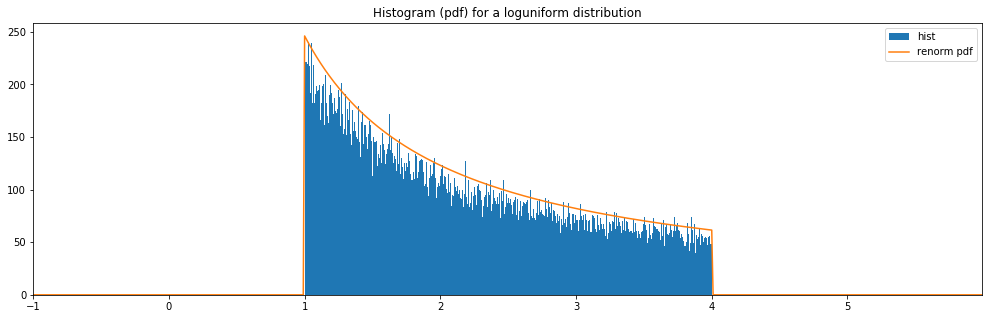

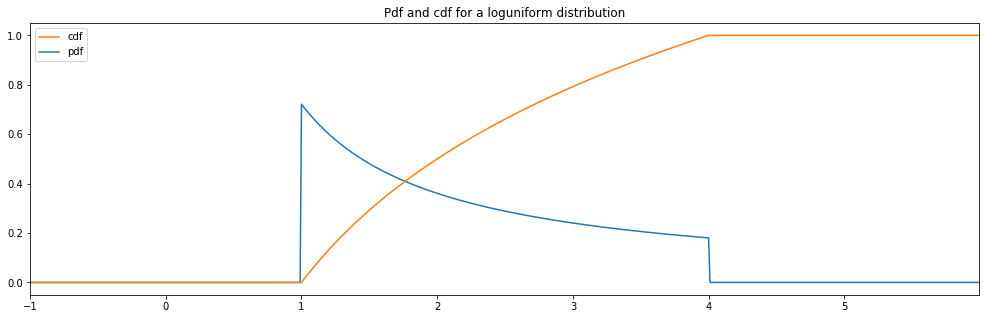

normal:


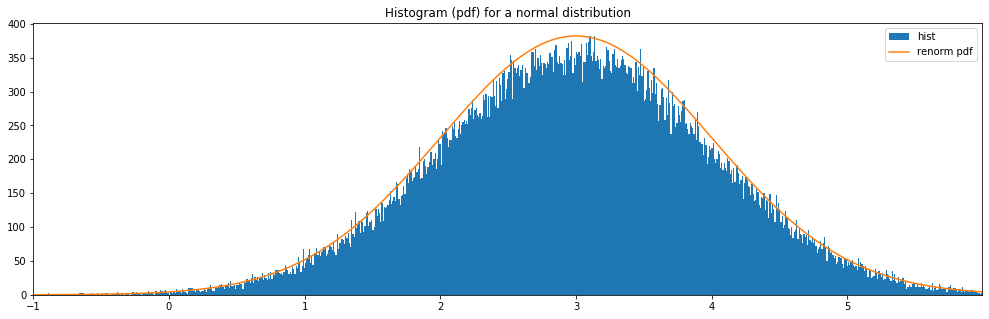

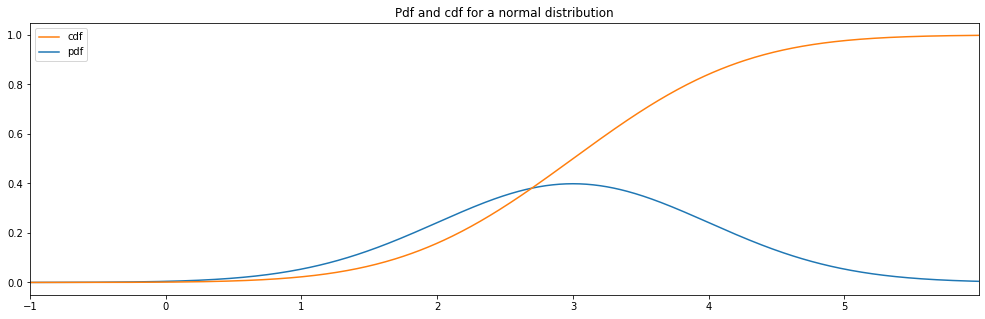

lognormal:


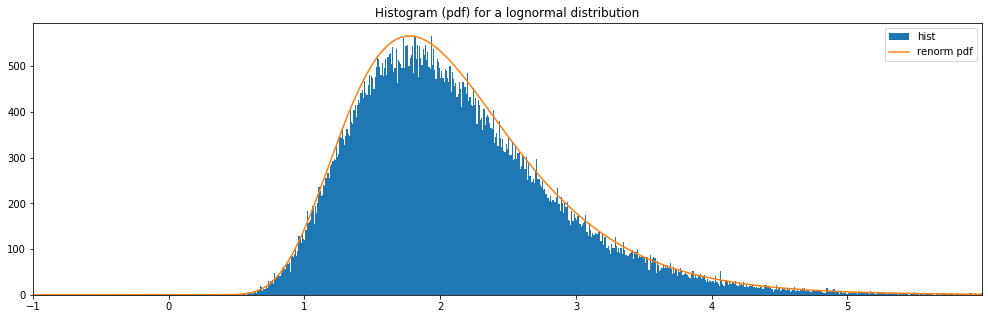

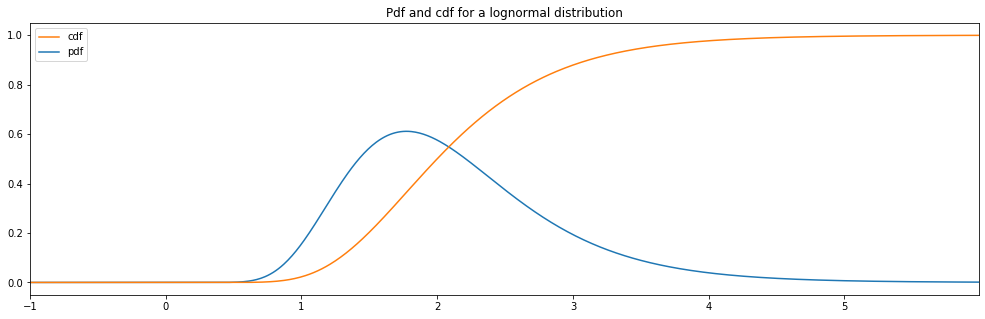

normal_clipped:


In [ ]:
continuous_hyperparameter_space = HyperparameterSpace({
    "uniform": Uniform(2., 4.),
    "loguniform": LogUniform(1., 4.),
    "normal": Normal(3.0, 1.0),
    "lognormal": LogNormal(1.0, 0.5),
    "normal_clipped": Normal(3.0, 1.0, hard_clip_min=1., hard_clip_max=5.),
    "lognormal_clipped": LogNormal(1.0, 0.5, hard_clip_min=2., hard_clip_max=4.)
})
plot_distribution_space(continuous_hyperparameter_space, num_bins=CONTINUOUS_NUM_BINS)

In [ ]:

### Quantized Hyperparameter Distributions

# Here are now the quantized hyperparameter distributions. Those are distributions that yield integers or other precise specific values. 

# Also, notice how there are border effects to the left and right of the charts when we use `Quantized(...)` as a distribution wrapper to round the numbers. 
# Those weird border effect wouldn't appear if you'd limit the distribution to half numbers instead of plain number. 
# Let's say you have a `Quantized(Uniform(-10, 10))`: then the samples from approximately -9.5 to -8.5 are rounded to 
# the bin of the number -9, but the values from -10 to -9.5 are rounder to the bin -10 and a half is missing, so the -10 
# bin sees its values sampled half as often as -9. That explains the border effect, and you could fix it easily by taking the uniform range from -10.49999 to 10.49999.

In [ ]:
quantized_hyperparameter_space = HyperparameterSpace({
    "quantized uniform": Quantized(Uniform(1., 5.)),
    "repaired quantized uniform": Quantized(Uniform(0.49999, 5.49999)),
    "quantized loguniform": Quantized(LogUniform(1.0, 4.0)),
    "quantized normal": Quantized(Normal(3.0, 1.0)),
    "quantized lognormal": Quantized(LogNormal(1.0, 0.5))
})
plot_distribution_space(quantized_hyperparameter_space, num_bins=DISCRETE_NUM_BINS)